# **Introdução** 

# **Desenvolvimento** 

Iremos, neste relatório, utilizar o processamento digital de imagens para: gerar histogramas da distribuição de pixels em uma imagem, aplicar a equalização no histograma e na imagem, modificar o contraste, gerar trackbars para alterar o contraste e brilho da imagem e aplicar métodos de Thresholding como o Otsu Thresholding e o Adaptative Thresholding.

## Imagem e Histograma

 Transformações


As transformações têm o objetivo de minimizar/acentuar características da imagem, como o brilho, contraste, equalizar os pixels da imagem de 

Para utilizar os recursos para modificar e extrair dados das imagens, é necessário importar as bibliotecas OpenCV, Numpy e MatPlotLib. Do módulo `__future__`, também importamos `print_function` e `division`.

In [ ]:
from __future__ import print_function
from __future__ import division
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

Já para mostrar as imagens, plotando-as no notebook, precisamos definir a função `show_img` que plota as imagens normalmente e em escala de cinza:

A função abaixo nomeada de `show_img` tem como objetivo a generalização de mostrar imagens de acordo com sua assinatura `show_img(titulo, img, cmap=None)`.  O primeiro parâmetro tem relação ao título da figura, ou seja, quando a imagem for mostrada, utilizando a biblioteca `matplotlib`, o título será igual a `titulo` (é esperado que seja uma cadeia de caracteres). O segundo parâmetro dessa função recebe um array de $n$ dimensões, as quais representam os canais das imagens. O `cmap` é um parâmetro que define qual mapeamento de cores vai ser utilizado.

In [ ]:
def show_img(titulo, img, cmap=None):
    if cmap is not None:
        plt.imshow(img, cmap=cmap)
    else:
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        plt.imshow(img)
    plt.title(titulo)
    plt.axis("off")
    plt.show()

Abaixo, salvamos em `src` a imagem da lena.

In [ ]:
src = cv.imread("lena.jpg")

A partir da imagem `lena.jgp`, dividimos a mesma no modelo BGR.

In [ ]:
bgr_planes = cv.split(src)

Já para criar o histograma, temos que definir suas dimensões, salvando-as em `histSize`, a quantidade de linhas do histograma, e `histRange`, e definir o parâmetro `accumulate`.

In [ ]:
# [Establish the number of bins]
histSize = 256

## [Set the ranges ( for B,G,R) )]
histRange = (0, 256) # the upper boundary is exclusive

## [Set histogram param]
accumulate = False

Agora, utilizando `calcHist` da OpenCV, criamos um histograma para cada uma das bandas BGR. Como parâmetros para cada um dos histogramas, passamos a imagem dividida, a posição do vetor onde está a faixa desejada, `None` para não aplicar nenhuma máscara, as dimensões que salvamos anteriormente e o parâmetro `accumulate` que foi definido como `False`.

In [ ]:
b_hist = cv.calcHist(bgr_planes, [0], None, [histSize], histRange, accumulate=accumulate)
g_hist = cv.calcHist(bgr_planes, [1], None, [histSize], histRange, accumulate=accumulate)
r_hist = cv.calcHist(bgr_planes, [2], None, [histSize], histRange, accumulate=accumulate)

Para os histogramas de cada banda foram geradas 3 matrizes correspondentes ao BGR, ou seja, `b_hist` corresponde ao histograma do pixel azul na imagem analisada e assim por diante. No entanto, cada pixel, varia de 0 a 255, como queremos mostrar uma imagem com maiores dimensões é necessário normalizar/padronizar para uma diferente proporção. Logo a operação de normalizar os histogramas é feita utilizando a função `normalize`, com o parâmetro de `NORM_MINMAX` que significa que a padronização será feita utilizando valores de min e max na proporção. $$Normalization(x) = \dfrac{x-min}{max-min}$$

In [ ]:
## [Draw the histograms for B, G and R]
hist_w = 512
hist_h = 400
bin_w = int(round( hist_w/histSize ))

histImage = np.zeros((hist_h, hist_w, 3), dtype=np.uint8)

## [Normalize the result to ( 0, histImage.rows )]
cv.normalize(b_hist, b_hist, alpha=0, beta=hist_h, norm_type=cv.NORM_MINMAX)
cv.normalize(g_hist, g_hist, alpha=0, beta=hist_h, norm_type=cv.NORM_MINMAX)
cv.normalize(r_hist, r_hist, alpha=0, beta=hist_h, norm_type=cv.NORM_MINMAX)

for i in range(1, histSize):
    cv.line(histImage, ( bin_w*(i-1), hist_h - int((b_hist[i-1])) ),
            ( bin_w*(i), hist_h - int((b_hist[i])) ),
            ( 255, 0, 0), thickness=2)
    cv.line(histImage, ( bin_w*(i-1), hist_h - int((g_hist[i-1])) ),
            ( bin_w*(i), hist_h - int((g_hist[i])) ),
            ( 0, 255, 0), thickness=2)
    cv.line(histImage, ( bin_w*(i-1), hist_h - int((r_hist[i-1])) ),
            ( bin_w*(i), hist_h - int((r_hist[i])) ),
            ( 0, 0, 255), thickness=2)

show_img('Source image', src)
show_img('calcHist Demo', histImage)

## Equalizador

O Equalizador recebe um histograma e muda a distribuição de valores para reduzir diferenças acentuadas. Utilizamos a imagem `wiki.png` que está em escala de cinza para aplicar a equalização. Salvamos esta imagem na variável `img` e e a imagem com o histograma equalizado em `equ`. Para aplicar esta modificação, utilizamos o método `equalizeHist` que: calcula o histograma da imagem, normaliza o histograma, calcula a integral do histograma e a transforma em uma Look-Up Table. Além disso, esse método faz normalização no brilho e aumenta o contraste da imagem.

In [3]:
img = cv.imread('wiki.png',0)
equ = cv.equalizeHist(img)

(Text(0.5, 1.0, 'Histograma imagem original'), ([], []), ([], []))

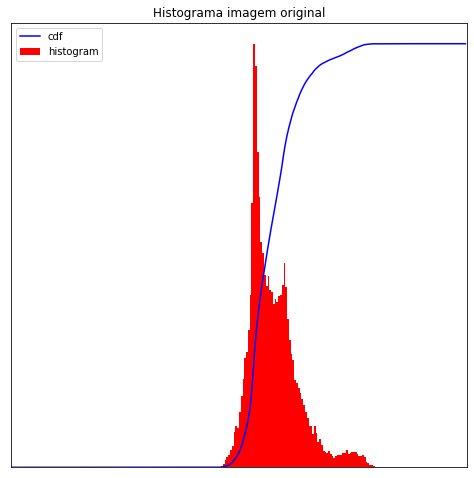

In [5]:
#histograma e cdf  da imagem original
hist,bins = np.histogram(img.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

fig = plt.figure(figsize=(18, 18))
plt.subplot(221)
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.title('Histograma imagem original'), plt.xticks([]), plt.yticks([])

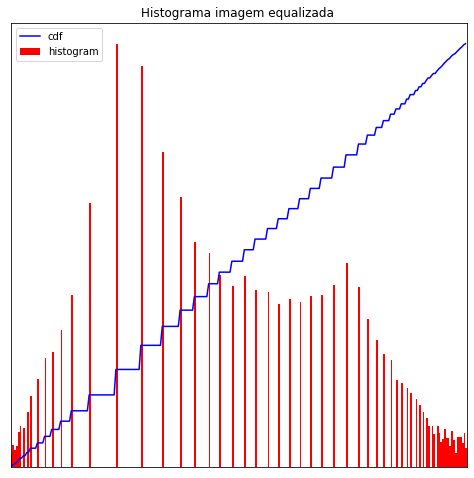

In [9]:
#histograma e cdf da imagem equalizada
hist,bins = np.histogram(equ.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

fig = plt.figure(figsize=(18, 18))
plt.plot(cdf_normalized, color = 'b')
plt.hist(equ.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.title('Histograma imagem equalizada '), plt.xticks([]), plt.yticks([])
plt.show()

A célula abaixo apenas mostra as imagens original e a equalizada.

<Figure size 1296x1296 with 0 Axes>

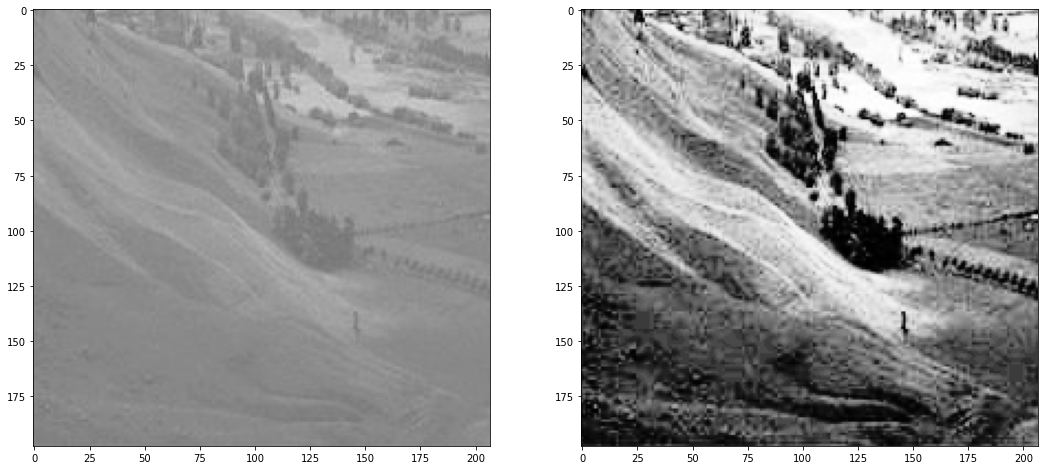

In [22]:
# o formato opencv é BGR, e o plot usa RGB, entao usa COLOR_BGR2RGB
f, axarr = plt.subplots(1,2, figsize=(18,18))
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
axarr[1].imshow(cv.cvtColor(equ, cv.COLOR_BGR2RGB))

## Contraste

In [23]:
image = cv.imread("lena.jpg",cv.IMREAD_GRAYSCALE)
print(image.shape)
try:
    x,y,z=image.shape
except ValueError:
    print("imagem 2d")
    img2d=True

min=np.min(image)
max=np.max(image)
print(max,min)

(512, 512)
imagem 2d
245 21


255 0


((array([9.020e+02, 9.760e+02, 1.064e+03, 1.066e+03, 1.067e+03, 9.640e+02,
         9.590e+02, 0.000e+00, 9.910e+02, 8.720e+02, 7.000e+02, 5.700e+02,
         4.360e+02, 3.850e+02, 3.810e+02, 0.000e+00, 3.050e+02, 2.470e+02,
         1.960e+02, 2.040e+02, 1.690e+02, 1.330e+02, 9.500e+01, 0.000e+00,
         8.100e+01, 6.000e+01, 4.600e+01, 2.100e+01, 2.300e+01, 1.200e+01,
         1.100e+01, 0.000e+00, 7.000e+00, 7.000e+00, 1.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 2.000e+00, 3.000e+00, 1.700e+01, 3.100e+01,
         5.600e+01, 5.300e+01, 1.200e+02, 0.000e+00, 1.670e+02, 2.030e+02,
         2.630e+02, 3.070e+02, 4.090e+02, 4.740e+02, 6.470e+02, 0.000e+00,
         8.100e+02, 8.490e+02, 1.087e+03, 1.199e+03, 1.410e+03, 1.588e+03,
         1.758e+03, 1.864e+03, 0.000e+00, 1.937e+03, 2.069e+03, 2.041e+03,
         2.132e+03, 2.038

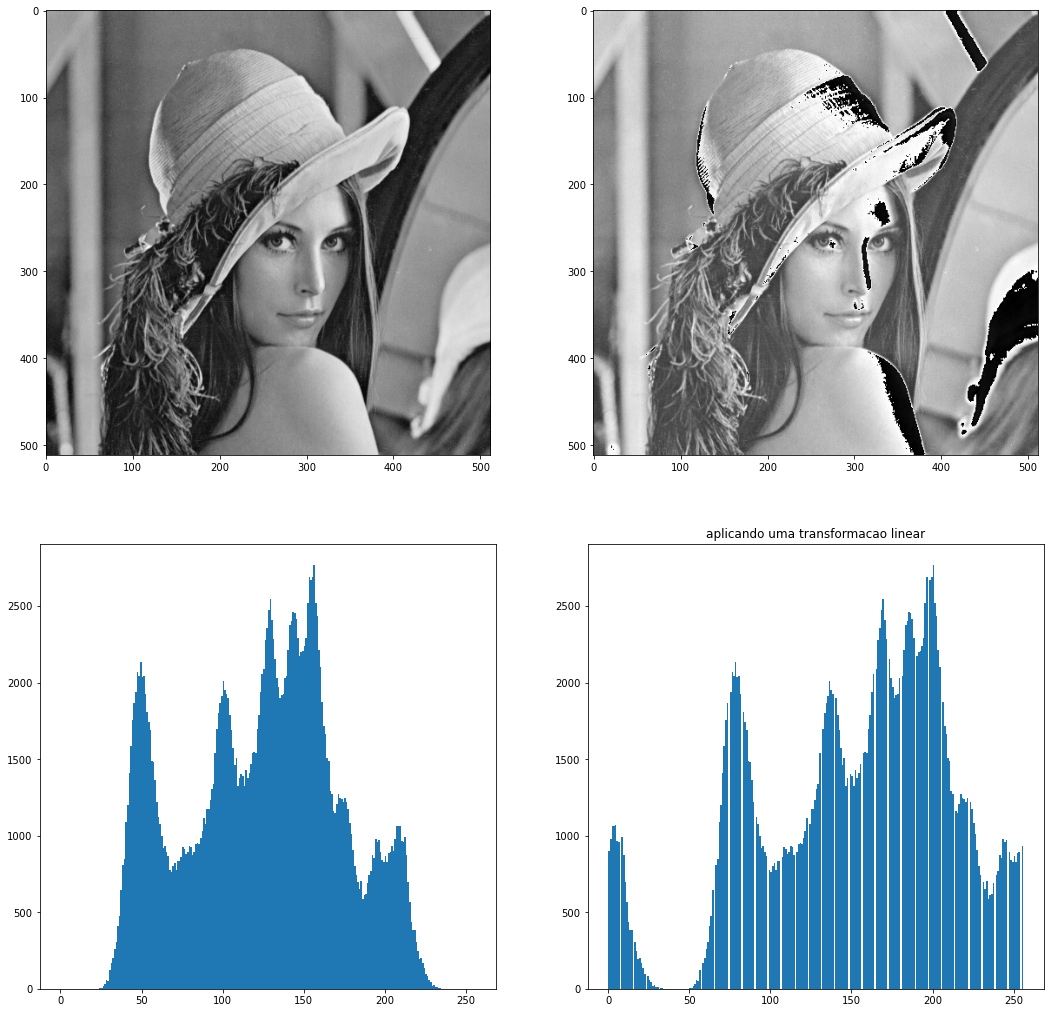

In [26]:
# um deslocamento de 20 na imagem
nova=(image+20)*(255/(max-min))
nova=np.uint8(nova)
print(np.max(nova),np.min(nova))

f, axarr = plt.subplots(2,2, figsize=(18,18))
axarr[0,0].imshow(image,cmap='gray')
axarr[0,1].imshow(nova,cmap='gray')

axarr[1,0].hist(image.ravel(),256,[0,256]),plt.title('Histograma para uma imagem em tons de cinza')
axarr[1,1].hist(nova.ravel(),256,[0,256]),plt.title('aplicando uma transformacao linear')

 Basic Linear Transforms 
-------------------------


((array([0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.0

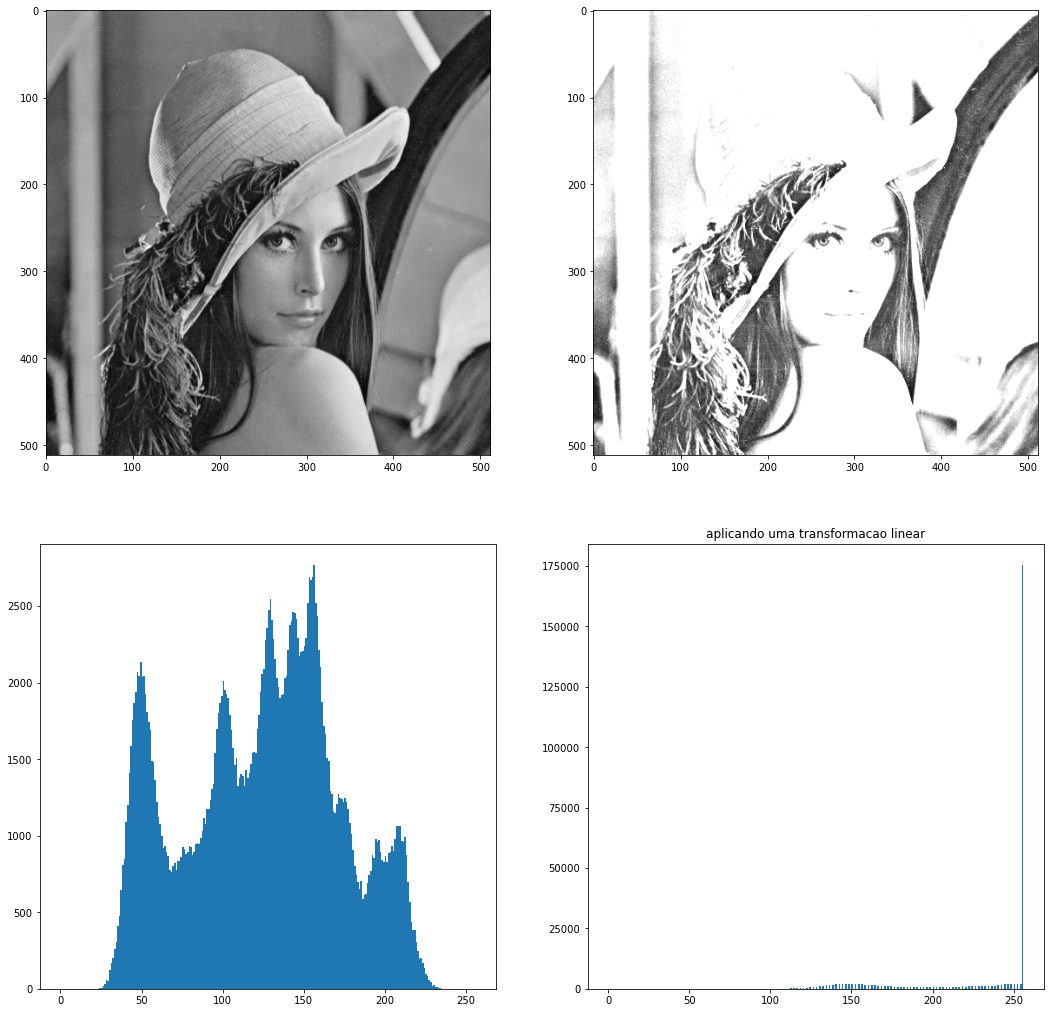

In [29]:
# agora, lendo os valores de contraste e brilho do teclado g(x) = alfa*f(x) + beta
new_image = np.zeros(image.shape, image.dtype)
alpha = 1.0 # Simple contrast control
beta = 0    # Simple brightness control

# Initialize values
print(' Basic Linear Transforms ')
print('-------------------------')

try:
    alpha = float(input('* Enter the alpha value [1.0-3.0]: '))
    beta = int(input('* Enter the beta value [0-100]: '))
except ValueError:
    print('Error, not a number')

# Do the operation new_image(i,j) = alpha*image(i,j) + beta
# Instead of these 'for' loops we could have used simply:
# new_image = cv.convertScaleAbs(image, alpha=alpha, beta=beta)
# but we wanted to show you how to access the pixels :)
for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        if (img2d):
            new_image[y,x] = np.clip(alpha*image[y,x] + beta, 0, 255)
        else:
           
            for c in range(image.shape[2]):
                new_image[y,x,c] = np.clip(alpha*image[y,x,c] + beta, 0, 255)

f, axarr = plt.subplots(2,2, figsize=(18,18))
axarr[0,0].imshow(image,cmap='gray')
axarr[0,1].imshow(new_image,cmap='gray')

axarr[1,0].hist(image.ravel(),256,[0,256]),plt.title('Histograma para uma imagem em tons de cinza')
axarr[1,1].hist(new_image.ravel(),256,[0,256]),plt.title('aplicando uma transformacao linear')


## Trackbar Contraste e Brilho

In [4]:
import cv2
import numpy as np

def histograma(src):
    
  ## [Separate the image in 3 places ( B, G and R )]
  bgr_planes = cv2.split(src)
  ## [Separate the image in 3 places ( B, G and R )]

  ## [Establish the number of bins]
  histSize = 256
  ## [Establish the number of bins]

  ## [Set the ranges ( for B,G,R) )]
  histRange = (0, 256) # the upper boundary is exclusive
  ## [Set the ranges ( for B,G,R) )]

  ## [Set histogram param]
  accumulate = False
  ## [Set histogram param]

  ## [Compute the histograms]
  b_hist = cv2.calcHist(bgr_planes, [0], None, [histSize], histRange, accumulate=accumulate)
  g_hist = cv2.calcHist(bgr_planes, [1], None, [histSize], histRange, accumulate=accumulate)
  r_hist = cv2.calcHist(bgr_planes, [2], None, [histSize], histRange, accumulate=accumulate)
  ## [Compute the histograms]

  ## [Draw the histograms for B, G and R]
  hist_w = 512
  hist_h = 400
  bin_w = int(round( hist_w/histSize ))

  histImage = np.zeros((hist_h, hist_w, 3), dtype=np.uint8)
  ## [Draw the histograms for B, G and R]

  ## [Normalize the result to ( 0, histImage.rows )]
  cv2.normalize(b_hist, b_hist, alpha=0, beta=hist_h, norm_type=cv2.NORM_MINMAX)
  cv2.normalize(g_hist, g_hist, alpha=0, beta=hist_h, norm_type=cv2.NORM_MINMAX)
  cv2.normalize(r_hist, r_hist, alpha=0, beta=hist_h, norm_type=cv2.NORM_MINMAX)
  ## [Normalize the result to ( 0, histImage.rows )]
  ## [Draw for each channel]
  for i in range(1, histSize):
      cv2.line(histImage, ( bin_w*(i-1), hist_h - int((b_hist[i-1])) ),
              ( bin_w*(i), hist_h - int((b_hist[i])) ),
              ( 255, 0, 0), thickness=2)
      cv2.line(histImage, ( bin_w*(i-1), hist_h - int((g_hist[i-1])) ),
              ( bin_w*(i), hist_h - int((g_hist[i])) ),
              ( 0, 255, 0), thickness=2)
      cv2.line(histImage, ( bin_w*(i-1), hist_h - int((r_hist[i-1])) ),
              ( bin_w*(i), hist_h - int((r_hist[i])) ),
              ( 0, 0, 255), thickness=2)
  ## [Draw for each channel]
  ## [Display]
  plt.imshow('calcHist Demo', histImage)
  
  ## [Display]

def BrilhoContraste(Brilho=0):
 
    # getTrackbarPos returns the
    # current position of the specified trackbar.
    Brilho = cv2.getTrackbarPos('Brilho','CCF394')
     
    Contraste = cv2.getTrackbarPos('Contraste','CCF394')
     
    effect = controller(img,Brilho, Contraste)
 
    plt.imshow('Effect', effect)
    histograma(effect)

def controller(img, Brilho=255, Contraste=127):
    Brilho = int((Brilho - 0) * (255 - (-255)) / (510 - 0) + (-255))
    Contraste = int((Contraste - 0) * (127 - (-127)) / (254 - 0) + (-127))
 
    if Brilho != 0:
         if Brilho > 0:
             shadow = Brilho
             max = 255
         else:
            shadow = 0
            max = 255 + Brilho
         al_pha = (max - shadow) / 255
         ga_mma = shadow
 
        # The function addWeighted calculates the weighted sum of two arrays
         cal = cv2.addWeighted(img, al_pha, img, 0, ga_mma)
 
    else:
        cal = img
 
    if Contraste != 0:
        Alpha = float(131 * (Contraste + 127)) / (127 * (131 - Contraste))
        Gamma = 127 * (1 - Alpha)
 

        cal = cv2.addWeighted(cal, Alpha, cal, 0, Gamma)

In [ ]:
original = cv2.imread("lena.jpg")
 
# Making another copy of an image.
img = original.copy()

# The function namedWindow creates
# a window that can be used as
# a placeholder for images.
cv2.namedWindow('CCF394')


plt.imshow('CCF394', original)

# createTrackbar(trackbarName, windowName, value, count, onChange)
# Brilho range -255 to 255
cv2.createTrackbar('Brilho', 'CCF394',255, 2 * 255, BrilhoContraste)
    
# Contraste range -127 to 127
cv2.createTrackbar('Contraste', 'CCF394',127, 2 * 127, BrilhoContraste) 
    
BrilhoContraste(0)

T hreshiolding

## Otsu Thresholding

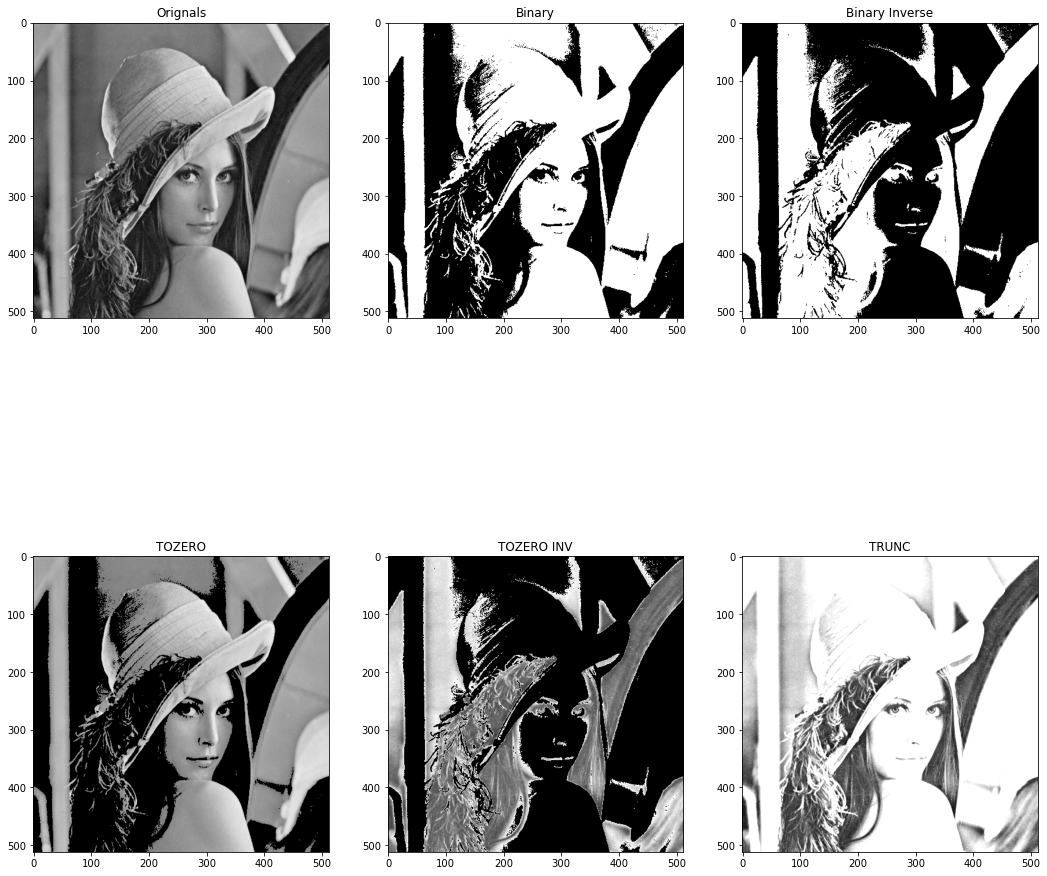

In [3]:
import cv2
import matplotlib.pyplot as plt

# implementando 5 metodos de binarização do opencv
threshold = 0
max_value = 255

image = cv2.imread("lena.jpg", 0)

# when applying OTSU threshold, set threshold to 0.

_, output1 = cv2.threshold(image, threshold, max_value, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
_, output2 = cv2.threshold(image, threshold, max_value, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
_, output3 = cv2.threshold(image, threshold, max_value, cv2.THRESH_TOZERO + cv2.THRESH_OTSU)
_, output4 = cv2.threshold(image, threshold, max_value, cv2.THRESH_TOZERO_INV + cv2.THRESH_OTSU)
_, output5 = cv2.threshold(image, threshold, max_value, cv2.THRESH_TRUNC + cv2.THRESH_OTSU)

images = [image, output1, output2, output3, output4, output5]
titles = ["Orignals", "Binary", "Binary Inverse", "TOZERO", "TOZERO INV", "TRUNC"]

f, axarr = plt.subplots(2,3, figsize=(18,18))
for i in range(2):
    for j in range(3):
        axarr[i, j].imshow(images[(i*3)+j], cmap='gray')
        axarr[i, j].set_title(titles[i*3+j])

plt.show()

## Adaptive Thresholding

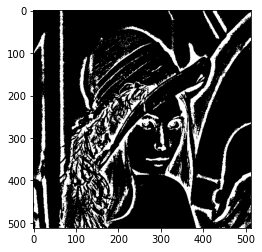

In [11]:
from skimage.filters import threshold_local
import cv2
import argparse
import numpy as np

# load the image and convert to grayscale and blur it slightly
img = cv2.imread("lena.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


# apply adaptive thresholding with OpenCV
neighbourhood_size = 25
constant_c = 15
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV,
                               neighbourhood_size, constant_c)
plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB), cmap='gray')

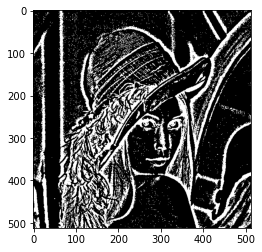

In [12]:
# apply adaptive thresholding with scikit-image
neighbourhood_size = 29
constant_c = 5
threshold_value = threshold_local(gray, neighbourhood_size, offset=constant_c)
# np.uint8 devolve a matriz para a faixa de 8 bits
thresh = (gray < threshold_value).astype(np.uint8) * 255
plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB), cmap='gray')

# **Conclusão** 